In [1]:
import sys
sys.path.append('/Users/vdk/GeneveWork/Code/calibpipe-main-calibpipe/')
from astropy.io import ascii
import numpy as np
import pandas as pd
import matplotlib
import csv
import scipy
import matplotlib.pyplot as plt
from seaborn import histplot
import random
import copy
from os import path, makedirs
from astropy.coordinates import SkyCoord
from astropy.table import Table
import astropy.units as u
from ctapipe.containers import MuonEfficiencyContainer
from ctapipe.coordinates import CameraFrame, TelescopeFrame
from ctapipe.io import EventSource, EventSeeker
from ctapipe.core import TelescopeComponent
from ctapipe.core.traits import (
    List,
    Int,
    FloatTelescopeParameter,
    TelescopeParameter,
    Unicode,
)
from ctapipe.image.cleaning import tailcuts_clean
from ctapipe.image.muon import MuonRingFitter, MuonIntensityFitter
from traitlets.config import Config
from ctapipe.image import ImageProcessor
from ctapipe.image.muon import MuonProcessor
from ctapipe.visualization import CameraDisplay
from ctapipe.instrument import CameraGeometry
from ctapipe.calib import CameraCalibrator
from traitlets.config.loader import Config, FileConfigLoader, JSONFileConfigLoader
import pathlib
from calibpipe.throughput import MuonCalibrator
from traitlets.config import Config
from astropy.time import Time
from astropy.coordinates import EarthLocation,SkyCoord, AltAz 
from traitlets.config import Config
import time






In [2]:
energies_all = []
for k in range(1,41):
    filename = f'/Users/vdk/sim_run_folder/output_prod_v12/corsika_theta_28.4_az_182.75_run{k}.simtel.gz'
    source = EventSource(filename)
    event_iterator = iter(source)
    keks = k*1000
    for i,j in enumerate(event_iterator):
        energies_all.append(j.simulation.shower.energy)

In [6]:
def number_events(E0, E1, k = -2, A = 1000100.01):
    return A * (E1**(k+1)-E0**(k+1))/(k+1)

energies = np.logspace(1,5,45)

events = number_events(energies[:-1], energies[1:])

Text(0.5, 1.0, 'Detected proton energies for 3LST')

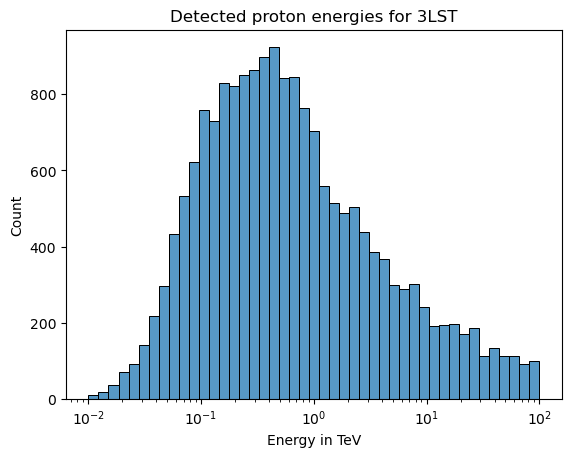

In [8]:
energies_new = [i.to_value() for i in energies_all]
histplot(energies_new, log_scale = True, bins = 45)
plt.xlabel("Energy in TeV")
plt.title("Shower energies for 3LST")
#plt.savefig("/Users/vdk/Shower_energies_3LST.png")

In [20]:
x,y = np.histogram(energies_new, bins = 44)


Text(0.5, 1.0, 'Detected proton energies for 3LST')

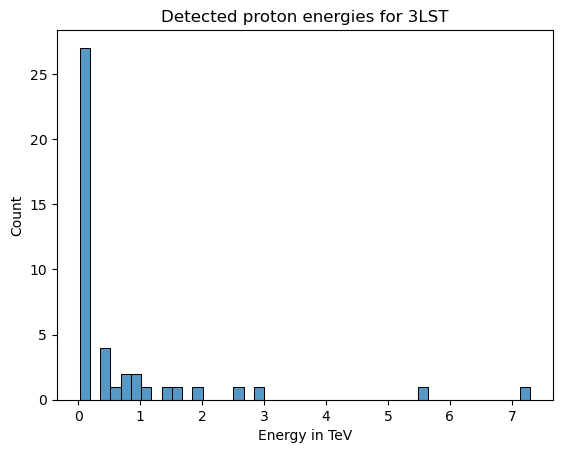

In [12]:
energies_lin = np.linspace(10,100000, 45)

events_lin = number_events(energies_lin[:-1], energies_lin[1:])
x/events_lin

histplot(x/events, log_scale = False, bins = 44)
plt.xlabel("Energy in TeV")
plt.title("Detected proton energies for 3LST")

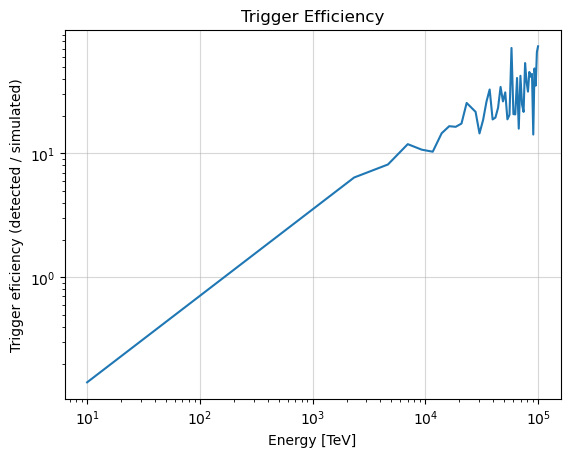

In [18]:
energi = np.linspace(10,100000,44)
plt.plot(energi,x/events_lin)
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Trigger eficiency (detected / simulated)")
plt.grid(alpha = 0.5)
plt.xlabel("Energy [GeV]")
plt.title("Trigger Efficiency")
plt.savefig('/Users/vdk/Trig.png')

In [25]:
energi

array([1.00000000e+01, 2.33534884e+03, 4.66069767e+03, 6.98604651e+03,
       9.31139535e+03, 1.16367442e+04, 1.39620930e+04, 1.62874419e+04,
       1.86127907e+04, 2.09381395e+04, 2.32634884e+04, 2.55888372e+04,
       2.79141860e+04, 3.02395349e+04, 3.25648837e+04, 3.48902326e+04,
       3.72155814e+04, 3.95409302e+04, 4.18662791e+04, 4.41916279e+04,
       4.65169767e+04, 4.88423256e+04, 5.11676744e+04, 5.34930233e+04,
       5.58183721e+04, 5.81437209e+04, 6.04690698e+04, 6.27944186e+04,
       6.51197674e+04, 6.74451163e+04, 6.97704651e+04, 7.20958140e+04,
       7.44211628e+04, 7.67465116e+04, 7.90718605e+04, 8.13972093e+04,
       8.37225581e+04, 8.60479070e+04, 8.83732558e+04, 9.06986047e+04,
       9.30239535e+04, 9.53493023e+04, 9.76746512e+04, 1.00000000e+05])

(array([1.4117e+04, 1.3950e+03, 5.9400e+02, 4.3400e+02, 2.3500e+02,
        1.5100e+02, 1.5200e+02, 1.3000e+02, 1.0000e+02, 8.5000e+01,
        1.0200e+02, 7.8000e+01, 6.1000e+01, 3.5000e+01, 3.9000e+01,
        4.8000e+01, 5.3000e+01, 2.7000e+01, 2.5000e+01, 2.7000e+01,
        3.6000e+01, 2.5000e+01, 2.7000e+01, 1.5000e+01, 1.5000e+01,
        4.8000e+01, 1.3000e+01, 1.2000e+01, 2.2000e+01, 8.0000e+00,
        2.0000e+01, 1.1000e+01, 9.0000e+00, 2.1000e+01, 1.4000e+01,
        1.1000e+01, 1.5000e+01, 1.3000e+01, 1.3000e+01, 4.0000e+00,
        1.3000e+01, 9.0000e+00, 1.6000e+01, 1.7000e+01]),
 array([1.00503527e-02, 2.28109113e+00, 4.55213190e+00, 6.82317268e+00,
        9.09421345e+00, 1.13652542e+01, 1.36362950e+01, 1.59073358e+01,
        1.81783765e+01, 2.04494173e+01, 2.27204581e+01, 2.49914989e+01,
        2.72625396e+01, 2.95335804e+01, 3.18046212e+01, 3.40756620e+01,
        3.63467027e+01, 3.86177435e+01, 4.08887843e+01, 4.31598251e+01,
        4.54308658e+01, 4.77019066e+01

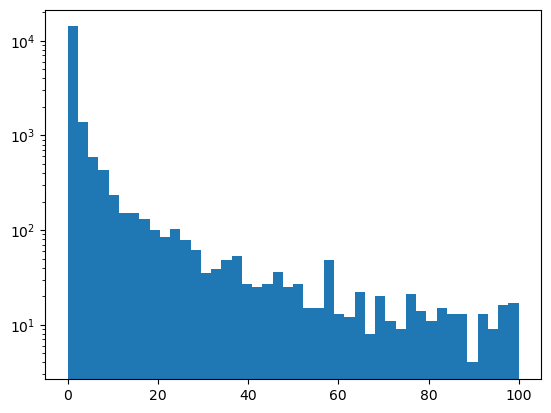

In [36]:
plt.hist(energies_new, bins = 44, log = True)

[1.88888058e+04 1.53212927e+04 1.24275729e+04 1.00803875e+04
 8.17651312e+03 6.63222188e+03 5.37959964e+03 4.36355913e+03
 3.53941734e+03 2.87093053e+03 2.32870026e+03 1.88888058e+03
 1.53212927e+03 1.24275729e+03 1.00803875e+03 8.17651312e+02
 6.63222188e+02 5.37959964e+02 4.36355913e+02 3.53941734e+02
 2.87093053e+02 2.32870026e+02 1.88888058e+02 1.53212927e+02
 1.24275729e+02 1.00803875e+02 8.17651312e+01 6.63222188e+01
 5.37959964e+01 4.36355913e+01 3.53941734e+01 2.87093053e+01
 2.32870026e+01 1.88888058e+01 1.53212927e+01 1.24275729e+01
 1.00803875e+01 8.17651312e+00 6.63222188e+00 5.37959964e+00
 4.36355913e+00 3.53941734e+00 2.87093053e+00 2.32870026e+00]


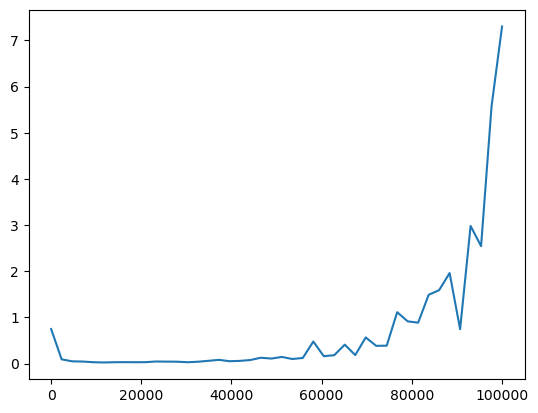

In [40]:
arr = [1.4117e+04, 1.3950e+03, 5.9400e+02, 4.3400e+02, 2.3500e+02,
        1.5100e+02, 1.5200e+02, 1.3000e+02, 1.0000e+02, 8.5000e+01,
        1.0200e+02, 7.8000e+01, 6.1000e+01, 3.5000e+01, 3.9000e+01,
        4.8000e+01, 5.3000e+01, 2.7000e+01, 2.5000e+01, 2.7000e+01,
        3.6000e+01, 2.5000e+01, 2.7000e+01, 1.5000e+01, 1.5000e+01,
        4.8000e+01, 1.3000e+01, 1.2000e+01, 2.2000e+01, 8.0000e+00,
        2.0000e+01, 1.1000e+01, 9.0000e+00, 2.1000e+01, 1.4000e+01,
        1.1000e+01, 1.5000e+01, 1.3000e+01, 1.3000e+01, 4.0000e+00,
        1.3000e+01, 9.0000e+00, 1.6000e+01, 1.7000e+01]
print(events)
plt.plot(energi, arr/events)

In [35]:
filename = f'/Users/vdk/sim_run_folder/output_prod_v12/corsika_theta_28.4_az_182.75_run{k}.simtel.gz'
source = EventSource(filename, max_events=9000)
event_iterator = iter(source)
test = next(event_iterator)

In [44]:
test.trigger.event_type

<EventType.SUBARRAY: 32>

In [46]:
test

ctapipe.containers.ArrayEventContainer:
                       index.*: event indexing information with default None
                          r0.*: Raw Data with default None
                          r1.*: R1 Calibrated Data with default None
                         dl0.*: DL0 Data Volume Reduced Data with default None
                         dl1.*: DL1 Calibrated image with default None
                         dl2.*: DL2 reconstruction info with default None
                  simulation.*: Simulated Event Information with default None
                                with type <class
                                'ctapipe.containers.SimulatedEventContainer'>
                     trigger.*: central trigger information with default None
                         count: number of events processed with default 0
                    pointing.*: Array and telescope pointing positions with
                                default None
                 calibration.*: Container for calibra

In [4]:
energies_all = []

for k in range(1,41):
    filename = f'/Users/vdk/sim_run_folder/output_prod_v12/corsika_theta_28.4_az_182.75_run{k}.simtel.gz'
    source = EventSource(filename)
    event_iterator = iter(source)
    keks = k*1000
    for i,j in enumerate(event_iterator):
        if len(j.trigger.tels_with_trigger) > 1:
            energies_all.append(j.simulation.shower.energy)

/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vdk/mambaforge/envs/cta/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Shower energies for 3LST')

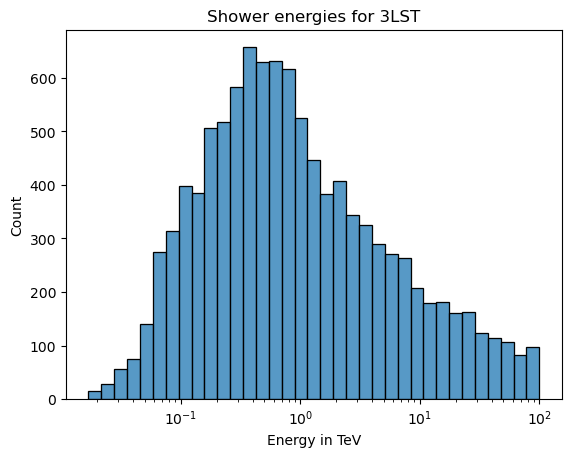

In [5]:
energies_new = [i.to_value() for i in energies_all]
histplot(energies_new, log_scale = True, bins = 35)
plt.xlabel("Energy in TeV")
plt.title("Shower energies for 3LST")
#plt.savefig("/Users/vdk/Shower_energies_3LST_stereo.png")

In [14]:
np.mean(energies_new)

5.213173825426458